In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'D:\\Users\\alexa\\Desktop\\projperso\\twitter_skate': ['.ipynb_checkpoints', 'df.csv', 'ntbk.ipynb', 'tweets_scraping.py', 'twit_auth.py', '__pycache__']


In [4]:
pwd

'D:\\Users\\alexa\\Desktop\\projperso\\twitter_skate'

In [5]:
df = pd.read_csv('df.csv')
print(df.shape)
df.head()

(695542, 8)


,twt_id,date,full_text,usr_name,usr_id,lang,location,description
0,1423428941839314949,2021-08-05 23:41:20,RT @cruzsevandro: o skate é a o esporte com pe...,yaslovisk,930604163091886080,pt,No seu coração bebê,"𝗢𝗿𝗮, 𝗾𝘂𝗲𝗿𝗶𝗱𝗼. 𝗦𝗲 𝗻ã𝗼 𝗮𝗴𝘂𝗲𝗻𝘁𝗮 𝗼 𝗰𝗮𝗹𝗼𝗿, 𝘀𝗮𝗶𝗮 𝗱𝗼 ..."
1,1423428934117601283,2021-08-05 23:41:18,RT @cruzsevandro: o skate é a o esporte com pe...,QuartzFumes,1168478932213096449,pt,ela/dela,cαdєlínhα dσ mαmαmσσ /\n мiуαиє /\n/вуυℓ υттє...
2,1423428931068305408,2021-08-05 23:41:17,RT @GQBrasil: . @LeticiaBufoni queremos ver o ...,gavassiBH,1263976762146459649,pt,Brazil,"↠ 𝘔𝘰𝘢𝘳𝘮𝘺, 𝘎𝘢𝘷𝘢𝘴𝘴𝘪𝘦𝘳 𝘦 𝘋𝘰𝘳𝘢𝘮𝘦𝘪𝘳𝘢 💜\nFan account ❀"
3,1423428930602733572,2021-08-05 23:41:17,RT @cruzsevandro: o skate é a o esporte com pe...,princpark,601475583,pt,Brasil,a full flower moment 🌼
4,1423428925582102529,2021-08-05 23:41:16,RT @SOLELINKS: Ad: RESTOCK👌\nNike SB Zoom Blaz...,Vo_Vision,109582509,en,Chicago Over Everything,@musicbreakr\nMusicbreakr is n a16z/TxO backed...


In [6]:
#df['date_only'] = df['date'].dt.date
#df.groupby('date_only').count()

In [7]:
df.date

0         2021-08-05 23:41:20
1         2021-08-05 23:41:18
2         2021-08-05 23:41:17
3         2021-08-05 23:41:17
4         2021-08-05 23:41:16
                 ...         
695537    2021-07-29 21:49:25
695538    2021-07-29 21:49:18
695539    2021-07-29 21:49:17
695540    2021-07-29 21:49:16
695541    2021-07-29 21:49:07
Name: date, Length: 695542, dtype: object

In [8]:
df_no_rt = df.loc[~df['full_text'].str.contains("RT @")]
print(df_no_rt.shape)

(320506, 8)


In [9]:
freq_df = df_no_rt.groupby('lang')['lang'].count().reset_index(name="count").sort_values(by='count', ascending=False)
freq_df

,lang,count
28,pt,255297
8,en,36784
9,es,10661
21,ja,4356
14,fr,2920
37,und,2000
20,it,1474
18,in,1178
5,da,938
23,lt,735


## Analyse sur les réactions françaises
En utilisant les métadonnées de twitter sur la langue, j'isole les tweets français

In [10]:
df_fr = df_no_rt[df_no_rt.lang == 'fr']
df_fr.head()

,twt_id,date,full_text,usr_name,usr_id,lang,location,description
232,1423427324524089344,2021-08-05 23:34:54,N’essayez pas le skate en pleine rue en étant ...,didine1eredunom,2968497256,fr,Belgique,BLM | she/her | 🌈 | 22
330,1423426708623998981,2021-08-05 23:32:27,@yykeste tu fais du skate ?,hbmeyy,1255657839831498752,fr,NaN,الله
482,1423425754780651529,2021-08-05 23:28:40,@djangophett @jvlmus IRL je le croise et je le...,ZASSIO1,1048882354390020096,fr,Bah chez moi frère,On est là hein \n\n\n🧐
800,1423423842245124098,2021-08-05 23:21:04,@Bruxellois_2 @Safvyaa Ptdrr tg toi t’es une r...,LyaTaReus,1412099692066967553,fr,Ta voisine (Bxl/Casa),🇲🇦
892,1423423225103622146,2021-08-05 23:18:37,J'ai fait du skate dans tout dole jsuis contente,TropDeSel,1172728018575462400,fr,route de tt les périls,Lilac Straw ♍she/her / pan&ace / INTP 9w1 / 19...


In [11]:
df_fr.head()

,twt_id,date,full_text,usr_name,usr_id,lang,location,description
232,1423427324524089344,2021-08-05 23:34:54,N’essayez pas le skate en pleine rue en étant ...,didine1eredunom,2968497256,fr,Belgique,BLM | she/her | 🌈 | 22
330,1423426708623998981,2021-08-05 23:32:27,@yykeste tu fais du skate ?,hbmeyy,1255657839831498752,fr,NaN,الله
482,1423425754780651529,2021-08-05 23:28:40,@djangophett @jvlmus IRL je le croise et je le...,ZASSIO1,1048882354390020096,fr,Bah chez moi frère,On est là hein \n\n\n🧐
800,1423423842245124098,2021-08-05 23:21:04,@Bruxellois_2 @Safvyaa Ptdrr tg toi t’es une r...,LyaTaReus,1412099692066967553,fr,Ta voisine (Bxl/Casa),🇲🇦
892,1423423225103622146,2021-08-05 23:18:37,J'ai fait du skate dans tout dole jsuis contente,TropDeSel,1172728018575462400,fr,route de tt les périls,Lilac Straw ♍she/her / pan&ace / INTP 9w1 / 19...


In [12]:
i = 1
lim = 10
for txt in df_fr.full_text:
    print(txt, "\n")
    i+=1
    if i > lim : break

N’essayez pas le skate en pleine rue en étant bourré 

@yykeste tu fais du skate ? 

@djangophett @jvlmus IRL je le croise et je le réoriente vers le skate parc le plus proche mon reuf 

@Bruxellois_2 @Safvyaa Ptdrr tg toi t’es une roulette de skate pourquoi tu parles 

J'ai fait du skate dans tout dole jsuis contente 

@DisSlaughterBoi Il c pas en vérité tes plus un negro skate rouleur https://t.co/2kKJMUkEFU 

@FayzerFN @dybdybfn "cringe" on est au skate park frr ??? 

AU DE SKATE AAAAAAAAAAAA https://t.co/0BFbGYS7KF 

@maxou__f Il est ou ton skate ? 

Savoir rouler en skate ✅                                Se casser la gueule en skate ✅ 



Les tweets n'ont pas tous l'air de concerner les J-O, et les réactions concernat ces jeux ont l'air assez mitigés. 

### Vérification du nombre de réaction au sujet de la disparition du karaté des jo et mentionnant le skate

In [13]:
df_karate = df_fr[df_fr['full_text'].str.contains("karat")]
print(df_karate.shape[0]/df_fr.shape[0])

0.017465753424657535


On observe un certain nombre de tweets mentionnant aussi le karaté

In [14]:
i = 1
lim = 15
for txt in df_karate.full_text:
    print(txt, "\n")
    i+=1
    if i > lim : break

@Steven_DaCosta @EquipeFRA @worldkarate_wkf @ffkarate @Tokyo2020fr @Visa_Fr @Sports_gouv @Olympics @Tokyo2020 @EmmanuelMacron @TonyEstanguet @Paris2024 Merci de permettre à ce champion de défendre son titre chez lui en 2024 vous n'avez aucune excuse. Ce sport séculaire a autant sa place au JO que le skate ou le Golf. 

Supprimer le karaté pour mettre du hip hop, serieux... 

Les JO se modernisent déjà très bien avec le basket 3*3, le skate Park, skate street, l'escalade etc. Le hip hop c'est too much https://t.co/t035c9HUD7 

Donc si je comprends bien aux JO 2024 plus de karaté mais par contre on va se taper skate et breakdance ! J’ai dû rater un truc ! #JeuxOlympiques 

@EquipeFRA @FFRollerSkate @FranceOlympique @Sports_gouv On garde le karaté et on laisse le skate! 

@Sarah_Croch1 Depuis tokyo chaque hôte a le droit de mettre au programme 5 disciplines additionnel. Le japon avait fait revenir le karaté ( l'escalade, le skate, le surf et le baseball) 

@DidierBourbon @francetvsport Le

Les réactions n'ont pas l'air très positives dans l'ensemble

### Analyse de sentiment sur les tweets français
On cherche à mesurer le sentiment global exprimé autour du skate pendant les JO en france.

In [15]:
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [22]:
df_fr['sentiment'] = df_fr.apply(lambda x: tb(x.full_text).sentiment[0], axis=1)
df_karate = df_fr[df_fr['full_text'].str.contains("karat")].reset_index()

D:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_karate.head()

,index,twt_id,date,full_text,usr_name,usr_id,lang,location,description,sentiment
0,4331,1423397054953447424,2021-08-05 21:34:37,@Steven_DaCosta @EquipeFRA @worldkarate_wkf @f...,mcfly_hg,1298637133352185858,fr,NaN,NaN,0.300000
1,5097,1423391362267889673,2021-08-05 21:12:00,"Supprimer le karaté pour mettre du hip hop, se...",FantaSuares,619374637,fr,France,27 🇸🇳🇫🇷 Chemical engineer👩‍🔬,0.225000
2,5631,1423387498948923392,2021-08-05 20:56:39,Donc si je comprends bien aux JO 2024 plus de ...,Dantarco,461557112,fr,Bordeaux,amoureux de Bordeaux et du Bassin d'Arcachon ...,0.111458
3,8359,1423367738450497541,2021-08-05 19:38:08,@EquipeFRA @FFRollerSkate @FranceOlympique @Sp...,Grandduch63,587759769,fr,"Auvergne, France",NaN,0.000000
4,11198,1423349328228331525,2021-08-05 18:24:59,@Sarah_Croch1 Depuis tokyo chaque hôte a le dr...,ladareune,1263022201,fr,"Paris, France",Cherche pas t'as tort. Moi c'est La Dareune et...,0.110000


In [31]:
lim = 10
for i in range(lim):
    print(df_karate.loc[i,"full_text"])
    print(df_karate.loc[i,"sentiment"], "\n")

@Steven_DaCosta @EquipeFRA @worldkarate_wkf @ffkarate @Tokyo2020fr @Visa_Fr @Sports_gouv @Olympics @Tokyo2020 @EmmanuelMacron @TonyEstanguet @Paris2024 Merci de permettre à ce champion de défendre son titre chez lui en 2024 vous n'avez aucune excuse. Ce sport séculaire a autant sa place au JO que le skate ou le Golf.
0.3 

Supprimer le karaté pour mettre du hip hop, serieux... 

Les JO se modernisent déjà très bien avec le basket 3*3, le skate Park, skate street, l'escalade etc. Le hip hop c'est too much https://t.co/t035c9HUD7
0.225 

Donc si je comprends bien aux JO 2024 plus de karaté mais par contre on va se taper skate et breakdance ! J’ai dû rater un truc ! #JeuxOlympiques
0.11145833333333333 

@EquipeFRA @FFRollerSkate @FranceOlympique @Sports_gouv On garde le karaté et on laisse le skate!
0.0 

@Sarah_Croch1 Depuis tokyo chaque hôte a le droit de mettre au programme 5 disciplines additionnel. Le japon avait fait revenir le karaté ( l'escalade, le skate, le surf et le baseball)


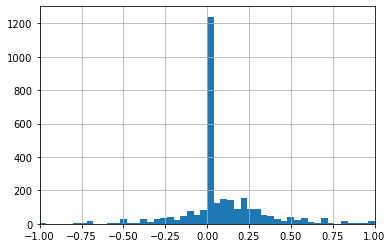

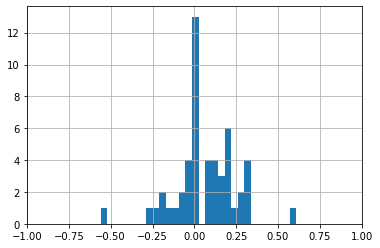

0.0
0.010000000000000004


In [17]:
df_fr['sentiment'].hist(bins=50)
plt.xlim(-1, 1)
plt.show()
df_karate['sentiment'].hist(bins=30)
plt.xlim(-1, 1)
plt.show()
print(df_fr['sentiment'].median())
print(df_karate['sentiment'].median())

Les répartitions ont l'air un peu différentes quand on filtre les tweets mentionnant le karaté

### Analyse lexicale

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

final_stopwords_list = stopwords.words('french') + ['https',"http","ça", "fait","quand", "co","aussi","tous","rien","peu","dit","alors","là","tout","vraiment","être","dire","quoi","si","donc"]
vectorizer = TfidfVectorizer(max_features=200000, min_df=0.008, stop_words=final_stopwords_list, use_idf=True)
vectorizer = CountVectorizer(max_features=200000, min_df=0.008, stop_words=final_stopwords_list)
X = vectorizer.fit_transform(df_fr.full_text)

On peut visualiser les différents mots du lexique et les différents stopwords : 

In [20]:
print(vectorizer.get_feature_names())

['12', '13', '15', '2021', '2024', 'acheter', 'aime', 'aller', 'anderson', 'ans', 'apprendre', 'après', 'autre', 'autres', 'avant', 'avoir', 'bah', 'basket', 'beaucoup', 'bien', 'bmx', 'board', 'bon', 'breakdance', 'bruno', 'ca', 'car', 'cette', 'ceux', 'chez', 'comme', 'comment', 'contre', 'cool', 'coup', 'depuis', 'deux', 'dis', 'discipline', 'déjà', 'elles', 'encore', 'entre', 'envie', 'escalade', 'etc', 'faire', 'fais', 'faut', 'femmes', 'fille', 'filles', 'finale', 'fois', 'font', 'fou', 'france', 'francetvsport', 'français', 'gars', 'genre', 'gens', 'grave', 'hein', 'homervrai', 'incroyable', 'jamais', 'jeunes', 'jeux', 'jeuxolympiques', 'jo', 'jsuis', 'juste', 'karaté', 'le_skate_', 'maintenant', 'mal', 'mars', 'mayer', 'mdr', 'mds', 'mec', 'merci', 'mettre', 'meuf', 'mieux', 'moins', 'moment', 'monde', 'médaille', 'niveau', 'non', 'nouveau', 'nuit', 'of', 'oh', 'ok', 'olympique', 'olympiques', 'or', 'oui', 'où', 'paak', 'parc', 'parce', 'paris', 'park', 'parle', 'parler', 'pend

In [21]:
print(vectorizer.get_stop_words())

frozenset({'vous', 'tu', 'soit', 'auras', 'il', 'aurai', 'ayants', 'fussent', 'sa', 'eût', 'fûmes', 'es', 'serons', 'auraient', 'skate', 'un', 'furent', 'aux', 'aurez', 'aurions', 's', 'quoi', 'eûmes', 'votre', 'été', 'ne', 'https', 'ses', 'eusse', 'aurais', 'rien', 'on', 'nous', 'd', 'serais', 'ai', 'pas', 'ayons', 'avez', 'l', 'aient', 'ce', 'de', 'eus', 'eues', 'sont', 'eusses', 'étée', 'dit', 'serait', 'c', 'aviez', 'serai', 'nos', 't', 'qui', 'la', 'ayant', 'auriez', 'co', 'mais', 'n', 'eut', 'sera', 'se', 'étantes', 'ait', 'étions', 'étiez', 'ils', 'm', 'ma', 'leur', 'aurait', 'soient', 'soyez', 'eussions', 'fût', 'aies', 'était', 'des', 'ou', 'ces', 'est', 'fussions', 'sur', 'avec', 'toi', 'être', 'si', 'fus', 'sois', 'étants', 'aie', 'moi', 'étés', 'suis', 'avait', 'ton', 'serez', 'étais', 'en', 'aurons', 'étaient', 'fûtes', 'par', 'mon', 'au', 'vos', 'alors', 'vraiment', 'fusse', 'étant', 'eux', 'avaient', 'tout', 'eussiez', 'tes', 'fusses', 'eu', 'fait', 'eue', 'elle', 'lui',

In [22]:
print(X.shape)

(2920, 161)


In [23]:
Xm = np.squeeze(np.asarray(X.mean(0)))

On fait la moyenne et la variance des différentes features dans le corpus

In [24]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
scalar.fit(X)
Xvar = scalar.var_

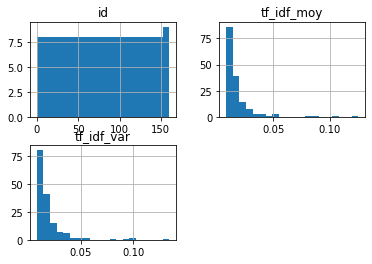

In [25]:
words_df = pd.DataFrame({'word': vectorizer.get_feature_names(),
                         'id': range(len(vectorizer.get_feature_names())),
                       'tf_idf_moy': Xm,
                        'tf_idf_var':Xvar})
words_df.hist(bins=20)
plt.show()

In [26]:
words_df.head()

,word,id,tf_idf_moy,tf_idf_var
0,12,0,0.011301,0.011859
1,13,1,0.016096,0.016522
2,15,2,0.008904,0.008825
3,2021,3,0.014384,0.022396
4,2024,4,0.009247,0.009846


On peut visualiser n features avec les moyennes ou les variances(à chager dans le code) les plus importantes

In [27]:
words_df.sort_values(['tf_idf_moy'], ascending=False).head(30)

,word,id,tf_idf_moy,tf_idf_var
46,faire,46,0.125000,0.134033
70,jo,70,0.101712,0.098216
106,park,106,0.086301,0.081593
115,plus,115,0.079110,0.092714
19,bien,19,0.054452,0.055597
9,ans,9,0.053425,0.101940
141,trop,141,0.051712,0.052463
30,comme,30,0.045205,0.047272
145,va,145,0.042808,0.046455
128,sport,128,0.040753,0.043887


### Corrélation entre différents mots
Je compare les moyennes ou les variances de chaque features pour en sélectionner certaines (comme précédemment).

Je choisis aussi de toutes les garder et de selectionner seulement celles qui ont une somme de corrélation avec le reste des features assez grande(plus par curiosité que par réelle méthode).

Je visualise ensuite les corrélations pour voir les sujets,adjectifs,verbes,etc...proches 1 à 1. 

In [28]:
top_words = words_df.sort_values(['tf_idf_moy'], ascending=False).head(45)
print(top_words)

subX = pd.DataFrame(X[:,top_words.id.values].todense())
subX.columns = top_words.word.values

subX_allW = pd.DataFrame(X.todense())
subX_allW.columns = words_df.word.values

corr_df = subX.corr()

top_corr_df = subX_allW.corr()
print(corr_df.shape)
top_corr_df["sum"] = top_corr_df.std(axis = 1, skipna = True)
top_corr_df = top_corr_df[top_corr_df["sum"] >=top_corr_df["sum"].quantile(0.8)]
print(corr_df.shape)
top_corr_df = top_corr_df.loc[:,top_corr_df.index.values]
print(top_corr_df.shape)

               word   id  tf_idf_moy  tf_idf_var
46            faire   46    0.125000    0.134033
70               jo   70    0.101712    0.098216
106            park  106    0.086301    0.081593
115            plus  115    0.079110    0.092714
19             bien   19    0.054452    0.055597
9               ans    9    0.053425    0.101940
141            trop  141    0.051712    0.052463
30            comme   30    0.045205    0.047272
145              va  145    0.042808    0.046455
128           sport  128    0.040753    0.043887
132            surf  132    0.038699    0.039256
138       tokyo2020  138    0.036644    0.035986
72            juste   72    0.034247    0.037183
47             fais   47    0.032192    0.035950
80              mds   80    0.031507    0.035309
153            voir  153    0.031164    0.031563
22              bon   22    0.030822    0.030557
91              non   91    0.029452    0.033379
129          sports  129    0.027740    0.039984
68             jeux 

In [29]:
def plot_corr(corr_df):
    f = plt.figure(figsize=(32, 20))
    plt.matshow(corr_df, fignum=f.number)
    plt.xticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
    plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

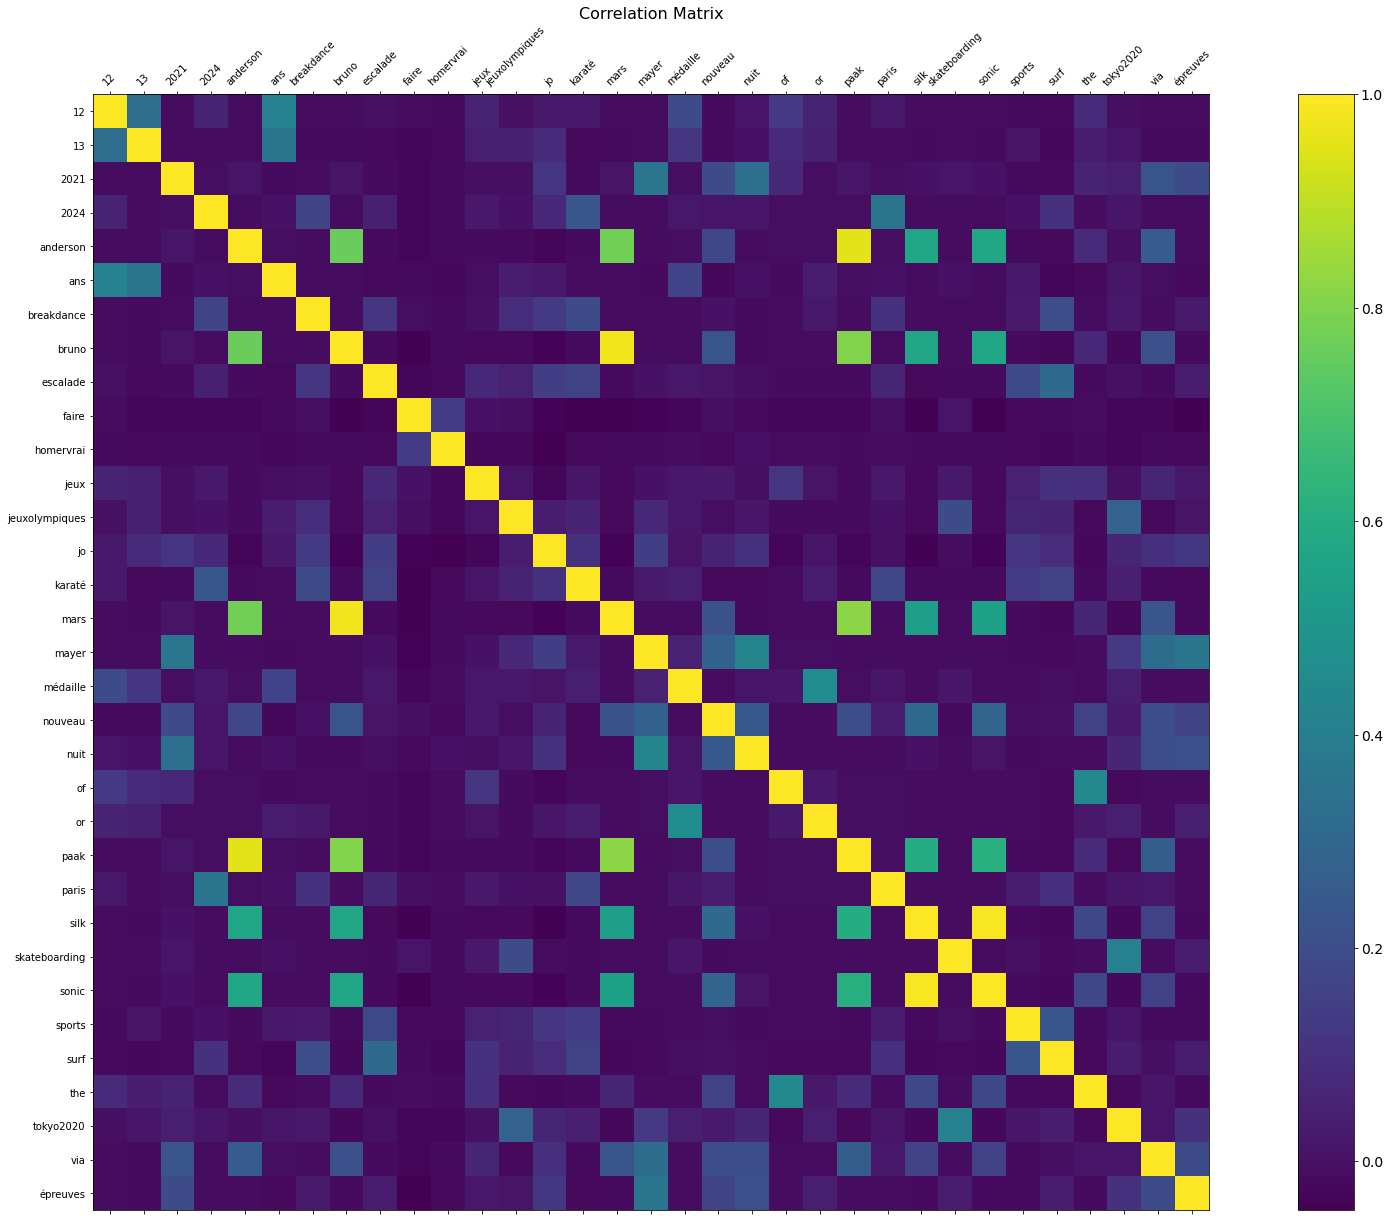

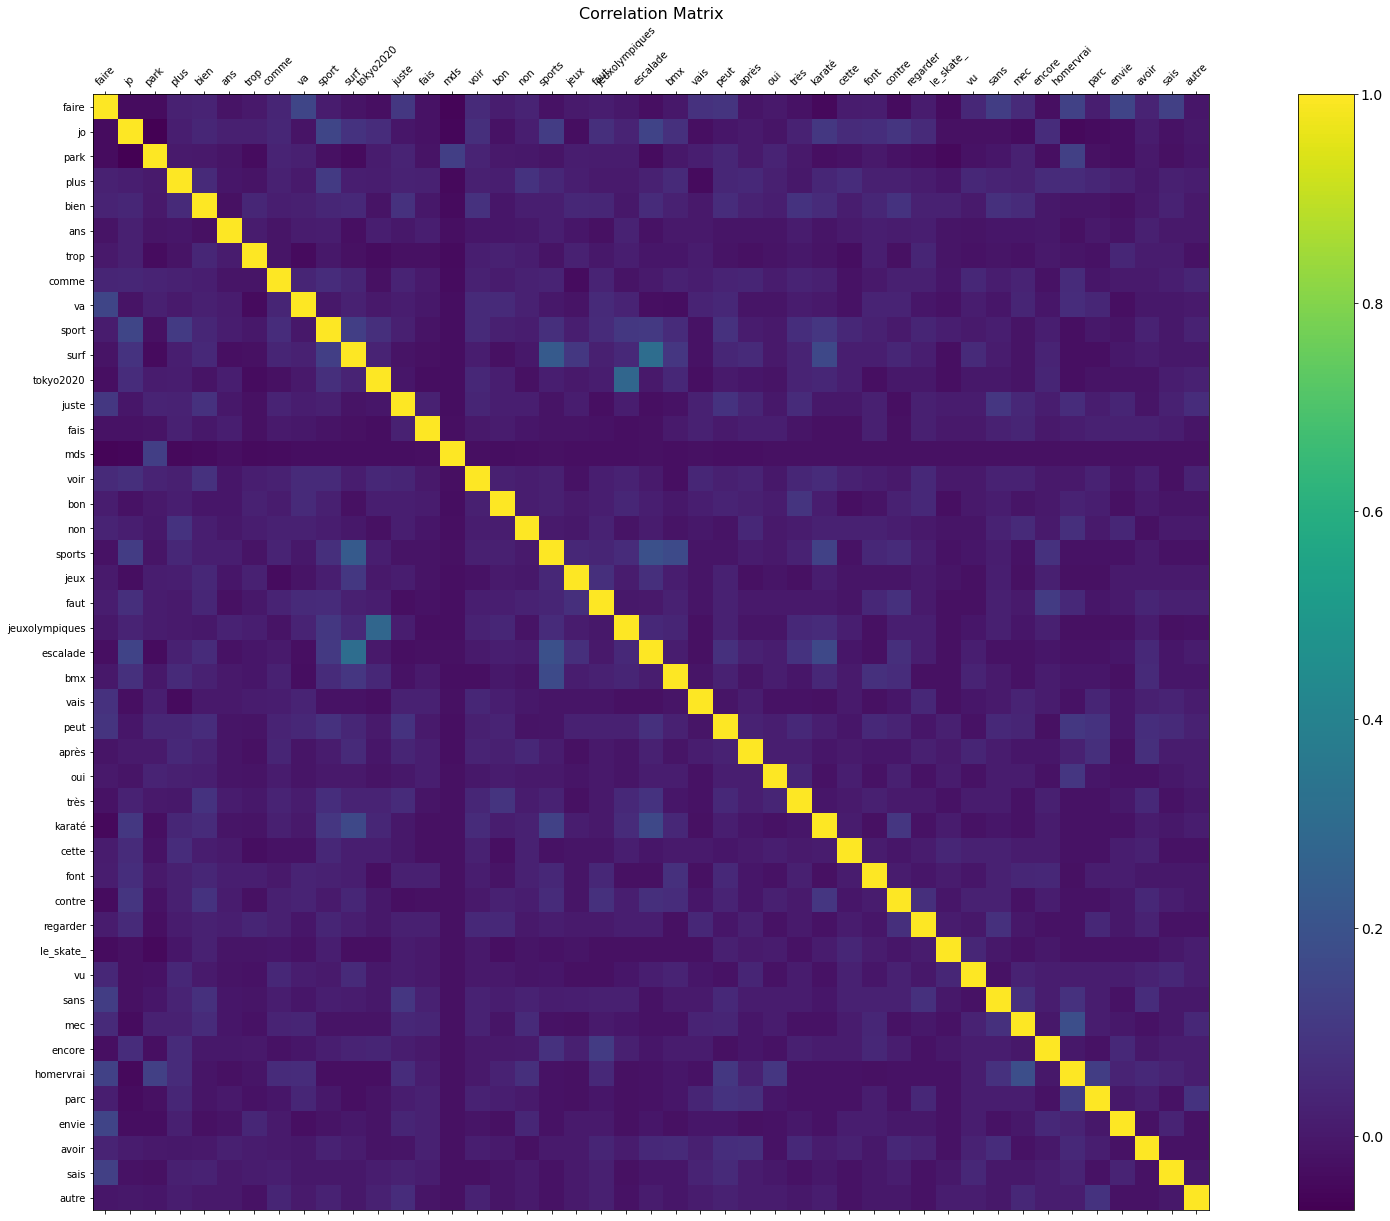

In [30]:
plot_corr(top_corr_df)
plot_corr(corr_df)

In [31]:
print(vectorizer.fit(df_fr.full_text))

CountVectorizer(max_features=200000, min_df=0.008,
                stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de',
                            'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils',
                            'je', 'la', 'le', 'les', 'leur', 'lui', 'ma',
                            'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne',
                            'nos', ...])


### Nuage de mots

In [ ]:
from wordcloud import WordCloud
from textblob import TextBlob

import numpy as np

import json


wc = WordCloud(background_color='white', stopwords= final_stopwords_list, max_words = 400, width = 1200, height=600, margin=2)

txt = ""
for t in df.full_text:
    txt += t
sentences = TextBlob(txt)
words = sentences.words.lower().lemmatize()
text = ' '.join(words)

plt.figure(figsize=(16, 9))
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()